# Delta Function Appeal

This notebook presents an agent-based model that simulates the propagation of a disease through a network.
It demonstrates how to use the [agentpy](https://agentpy.readthedocs.io) package to create and visualize networks, use the interactive module, and perform different types of sensitivity analysis. 

In [19]:
# Model design
import agentpy as ap
import networkx as nx 
import random 
import numpy as np
import pandas as pd
import os
# Visualization
import matplotlib.pyplot as plt 
import seaborn as sns
import IPython

from sklearn.utils import resample
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import KFold

import pickle

np.random.seed(42)

In [16]:
path = os.path.abspath(os.getcwd())

with open("../data/distributions_init.pickle", "rb") as f:
        d_fnw = pickle.load(f)

print(d_fnw)
path

FileNotFoundError: [Errno 2] No such file or directory: '../data/distributions_init.pickle'

In [20]:
import os

if os.path.isdir("../notebooks"):
    os.chdir("..")

from utils import viz, delta_function
from generate_data import generate_init
from clf import  classifier_train, classifier_train_star

from agent import Person

from model import TaxFraudModel




## optimize classifier

To run our model, we define a dictionary with our parameters. 
We then create a new instance of our model, passing the parameters as an argument, 
and use the method :func:`Model.run` to perform the simulation and return it's output. 

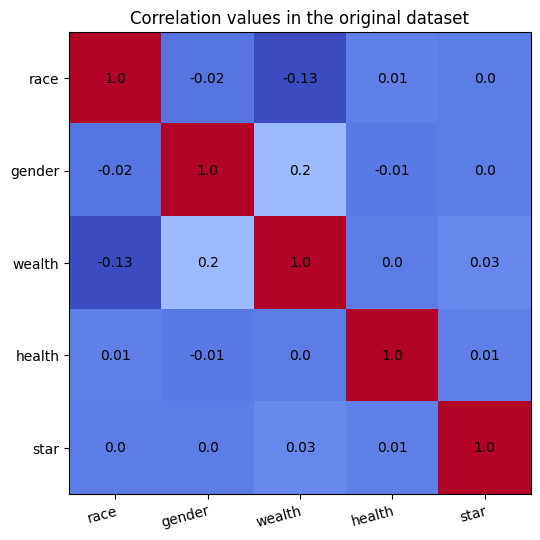

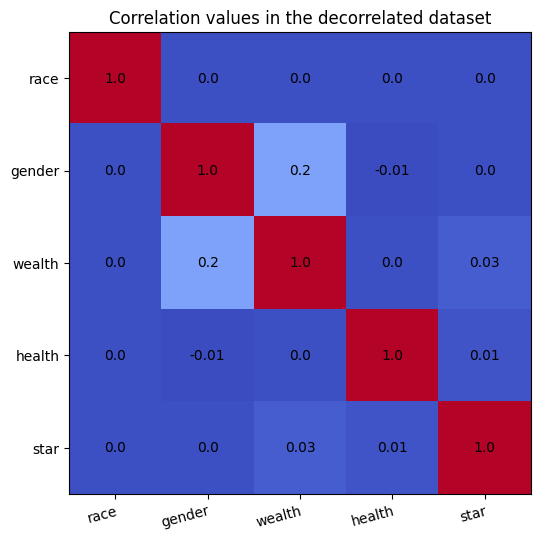

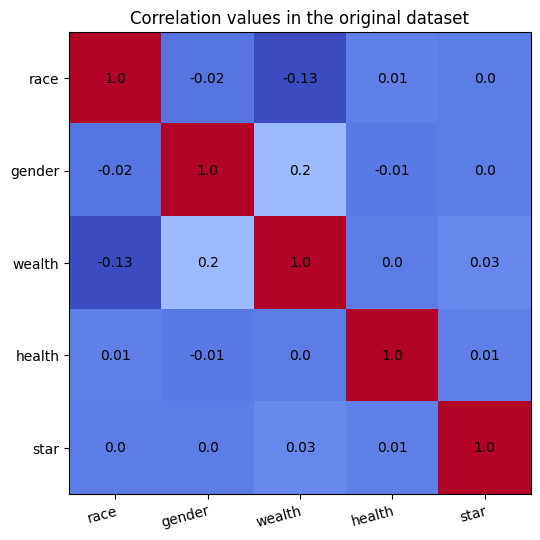

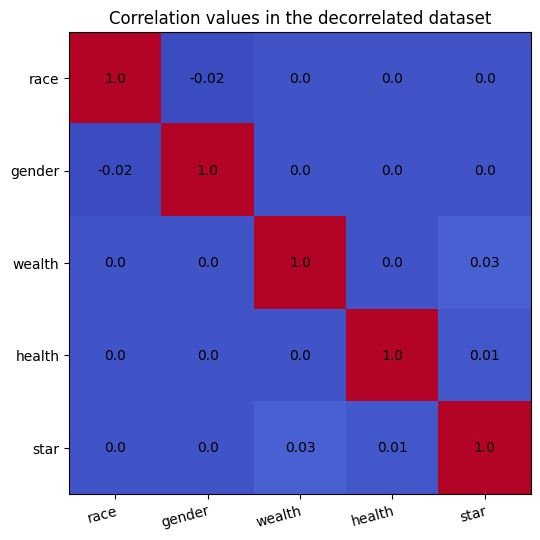

0.6865
dpd 0.96127728618001
eod 0.9610321367332263
dpd 0.9269662921348315
eod 0.9412763733751389


In [21]:
x,y = generate_init(star_version = 'is4', synth_data_acc = 0.7, abm_eval = 'GT', train_clf = True, n = 20000)
classifier_train_star(x, y)
# print(x)
# with open("clf2.pkl", "rb") as f:
#     clf = pickle.write(f)   



In [5]:
# parameters = {
#     'my_parameter':42,
#     'agents':500,
#     'steps':100,
#     'wealth_appeal_corr': 0, # >0 more wealth higher appeal chance
#     'acc': 0.8, # accuracy of fraud prdediction
#     'appeal_wealth': 0.3, # minimal wealth needed for appeal (could also become a param for distr. eventually)
#     #'wealth_impact'
#     'clf': 'pretrained', # None, 'hist'
#     'expi': None,
#     'fraud_det': 0,
#     'fairness_metrics' : True
    
# }
# sample = ap.Sample(parameters, n=1)
# model_baseline = VirusModel_baseline(parameters)
# exp = ap.Experiment(VirusModel_baseline, sample, iterations =20, record = True)
# results_baseline = exp.run() 


    
# df_baseline = results_baseline['variables']['Person']



In [6]:
# df_baseline = results_baseline['variables']['Person']


In [7]:
# with open("data/expis/fraud_expi_false_mpl_20run.pkl", "wb") as f:
#         pickle.dump(results_baseline, f)

In [8]:
# parameters = {
#     'my_parameter':42,
#     'agents':500,
#     'steps':100,
#     'wealth_appeal_corr': 0, # >0 more wealth higher appeal chance
#     'acc': 0.6, # accuracy of fraud prdediction
#     'appeal_wealth': 0.3, # minimal wealth needed for appeal (could also become a param for distr. eventually)
#     #'wealth_impact'
#     'clf': None, # None, 'hist'
#     'expi': None,
#     'fraud_det': 0,
#     'fairness_metrics' : True
    
# }
# sample = ap.Sample(parameters, n=1)
# model_baseline = VirusModel_baseline(parameters)
# exp = ap.Experiment(VirusModel_baseline, sample, iterations =20, record = True)
# r_baseline = exp.run() 

    
# df_b = r_baseline['variables']['Person']

In [9]:
# with open("data/expis/fraud_expi_false_prob_20run.pkl", "wb") as f:
#         pickle.dump(r_baseline, f)

In [10]:
# parameters = {
#     'my_parameter':42,
#     'agents':500,
#     'steps':100,
#     'wealth_appeal_corr': 0, # >0 more wealth higher appeal chance
#     'acc': 0.6, # accuracy of fraud prdediction
#     'appeal_wealth': 0.3, # minimal wealth needed for appeal (could also become a param for distr. eventually)
#     #'wealth_impact'
#     'clf': 'pretrained', # None, 'hist'
#     'expi': 'appeal',
#     'fraud_det': 0,
#     'fairness_metrics' : True
    
# }
# sample = ap.Sample(parameters, n=1)
# model_baseline = VirusModel_baseline(parameters)
# exp = ap.Experiment(VirusModel_baseline, sample, iterations =20, record = True)
# r_baseline = exp.run() 

    
# df_b = r_baseline['variables']['Person']

In [11]:
# with open("data/expis/fraud_expi_appeal_mlp_20run.pkl", "wb") as f:
#         pickle.dump(r_baseline, f)

In [12]:
parameters = {
    'my_parameter':42,
    'agents':100,
    'steps':100,
    'wealth_appeal_corr': 0, # >0 more wealth higher appeal chance
    'acc': 0.6, # accuracy of fraud prdediction
    'appeal_wealth': 0.3, # minimal wealth needed for appeal (could also become a param for distr. eventually)
    #'wealth_impact'
    'clf': None, # None, 'hist'
    'expi': 'appeal',
    'fraud_det': 0,
    'fairness_metrics' : True
    
}
sample = ap.Sample(parameters, n=1)
model_baseline = VirusModel_baseline(parameters)
exp = ap.Experiment(VirusModel_baseline, sample, iterations =1, record = True)
r_baseline = exp.run() 

    


NameError: name 'VirusModel_baseline' is not defined

In [ ]:
df_baseline = r_baseline['variables']['Person']

In [ ]:
def transform_pd(df_baseline):

    df_baseline['misclassifications'] = abs(df_baseline['fraud_pred'] - df_baseline['fraud'])
    df_baseline[df_baseline['fraud_pred'] ==0]['wealth'].min()

    df_baseline.head()
    df_baseline = df_baseline[df_baseline.fraud_pred != -1]
    df_baseline[df_baseline['misclassifications'] == 0]

    df_baseline['intersect'] = list(df_baseline['gender'])
    mask1 = ((df_baseline['gender'] == 0) & (df_baseline['race'] == 0))
    df_baseline.loc[mask1, 'intersect'] = 'fw'
    mask2 = ((df_baseline['gender'] == 1) & (df_baseline['race'] == 0))
    df_baseline.loc[mask2, 'intersect'] = 'mw'

    mask3 = ((df_baseline['gender'] == 0) & (df_baseline['race'] == 1))
    df_baseline.loc[mask3, 'intersect'] = 'fnw'

    mask4 = ((df_baseline['gender'] == 1) & (df_baseline['race'] == 1))
    df_baseline.loc[mask4, 'intersect'] = 'mnw'

    return df_baseline

Intersectionality

In [ ]:
df_baseline = transform_pd(df_baseline)
df_baseline

In [ ]:
def viz2(data, x, y):
    fig, ax = plt.subplots()

    sns.lineplot(ax = ax,
                 data = data,
                 x = x,
                 y = y,
                 marker = 'o')
    
    # plt.ylim(0,0.2)
    # plt.xlim(0,50)

    plt.show()

In [ ]:
def viz(data, x, y, hue, title = None):
    fig, ax = plt.subplots()

    sns.lineplot(ax = ax,
                 data = data,
                 x = x,
                 y = y,
                 hue = hue,
                 marker = 'o')
    
    # plt.ylim(0,0.2)
    # plt.xlim(0,50)
    plt.title(title)

    plt.show()

In [ ]:
df_baseline

In [ ]:

fig, ax = plt.subplots()

sns.lineplot(   x =  df_baseline.index.get_level_values('t'),
                y = df_baseline['dpd_gender'])

sns.lineplot(   x =  df_baseline.index.get_level_values('t'),
                y = df_baseline['eod_race'])
# plt.ylim(0,0.2)
# plt.xlim(0,50)

plt.show()

In [ ]:
sns.histplot(df_baseline['intersect'])

In [ ]:
viz(df_baseline, df_baseline.index.get_level_values('t'), df_baseline['wealth'], df_baseline['race'], title= 'MLP Classifier') #, df_baseline['convicted'])

viz(df_baseline, df_baseline.index.get_level_values('t'), df_baseline['wealth'], df_baseline['intersect'], title = 'MLP Classifier') #, df_baseline['convicted'])

viz(df_baseline, df_baseline.index.get_level_values('t'), df_baseline['fraud'], df_baseline['intersect'], title = 'MLP Classifier') #, df_baseline['convicted'])


viz(df_baseline, df_baseline.index.get_level_values('t'), df_baseline['gender'], (df_baseline['misclassifications']), title= 'Misclassification of MLP') #, df_baseline['convicted'])

viz2(df_baseline, df_baseline.index.get_level_values('t'), df_baseline['wealth'])
viz2(df_baseline, df_baseline.index.get_level_values('t'), df_baseline['fraud'])
viz2(df_baseline, df_baseline.index.get_level_values('t'), df_baseline['fraud_pred'])





# fig, ax = plt.subplots()

# sns.violinplot(ax = ax,
#                 data = df_baseline,
#                 x = df_baseline.index.get_level_values('t'),
#                 y = df_baseline['wealth'], cut = True)

# # plt.ylim(0,0.2)
# plt.xlim(30, 60)
# # plt.title(title)

# plt.show()

# viz(df_baseline, df_baseline.index.get_level_values('t'), abs(df_baseline['fraud'] - df_baseline['fraud_pred']), df_baseline['race'])#, df_baseline['fraud'])

In [ ]:

# fig, ax = plt.subplots()

# sns.lineplot(ax = ax,
#                 data = df_baseline,
#                 x = df_baseline.index.get_level_values('t'),
#                 y = df_baseline['wealth'],
#                 hue =df_baseline['fraud_pred'],
#                 marker = 'o' )

# sns.lineplot(ax = ax,
#                 data = df_baseline,
#                 x = df_baseline.index.get_level_values('t'),
#                 y = df_baseline['wealth'],
#                 hue =df_baseline['fraud'],
#                 marker = 'x' )

# # plt.ylim(0,0.2)
# plt.xlim(0,10)
# plt.title('title')

In [ ]:
# create baseline value fraud prediction medium income

df_b1 = df_baseline.iloc[(df_baseline['fraud_pred'] == 1).values] 
baseline1 = df_b1.groupby(level='t').mean()
# df_b
df_b0 = df_baseline.iloc[(df_baseline['fraud_pred'] == 0).values] 
baseline0 = df_b0.groupby(level='t').mean()

baseline0
df_b0
df_baseline.head(400)
baseline1
# df_x1 = df.iloc[(df_baseline['fraud_pred'] == 1).values] 
# df_wb1 = df_x1['wealth'] - baseline1['wealth']
# df_x1['wealth'] = df_wb1




# df_x0 = df_baseline.iloc[(df_baseline['fraud_pred'] == 0).values] 
# df_wb0 = df_x0['wealth'] - baseline0['wealth']
# df_x0['wealth'] = df_wb0

# df_xb = pd.concat([df_x0, df_x1])

# df_xb

In [ ]:
parameters = {
    'my_parameter':42,
    'agents':100,
    'steps':100,
    'wealth_appeal_corr': 0, # >0 more wealth higher appeal chance
    'acc': 0.6, # accuracy of fraud prdediction
    'appeal_wealth': 0.3, # minimal wealth needed for appeal (could also become a param for distr. eventually)
    #'wealth_impact'
    'clf': None, # None, 'hist'
    'expi': 'apppeal',
    'fraud_det': 0,
    'fairness_metrics' : True
    
    
}
sample = ap.Sample(parameters, n=1)
model_baseline = VirusModel_baseline(parameters)
exp = ap.Experiment(VirusModel_baseline, sample, iterations =5, record = True)
r_baseline = exp.run() 

# with open("data/expis/fraud_1.pkl", "wb") as f:
#         pickle.dump(results_baseline, f)
    
df_b = r_baseline['variables']['Person']


In [ ]:
df_b = transform_pd(df_b)
df_b

In [ ]:
viz(df_baseline2, df_baseline2.index.get_level_values('t'), df_baseline2['race'], abs(df_baseline2['misclassifications']), title = 'Misclassification of Probabilistic Classifier ') #, df_baseline['convicted'])


In [ ]:
viz(df_b, df_b.index.get_level_values('t'), df_b['wealth'], abs(df_b['misclassifications']), title = 'Misclassification of Probabilistic Classifier ') #, df_baseline['convicted'])

viz(df_b, df_b.index.get_level_values('t'), df_b['fraud_pred'], df_b['race'], title= 'Probabilitic Classifier') #, df_baseline['convicted'])

viz(df_b, df_b.index.get_level_values('t'), df_b['race'], df_b['fraud_pred'], title= 'Probabilitic Classifier') #, df_baseline['convicted'])


# viz(df_b, df_b.index.get_level_values('t'), df_b['wealth'], df_b['fraud'],title= 'Probabilitic Classifier') #, df_baseline['convicted'])
viz2(df_baseline, df_baseline.index.get_level_values('t'), df_baseline['wealth']<0.1)
viz2(df_b, df_b.index.get_level_values('t'), df_b['wealth']<0.1)
viz2(df_b, df_b.index.get_level_values('t'), df_b['fraud'])
viz2(df_b, df_b.index.get_level_values('t'), df_b['fraud_pred'])

# viz(df_baseline, df_baseline.index.get_level_values('t'), abs(df_baseline['fraud'] - df_baseline['fraud_pred']), df_baseline['race'])#, df_baseline['fraud'])

In [ ]:
fig, ax = plt.subplots()

sns.violinplot(ax = ax,
                data = df_b,
                x = df_b.index.get_level_values('t'),
                y = df_b['wealth'], cut = True)

# plt.ylim(0,0.2)
plt.xlim(0,50)
# plt.title(title)

plt.show()

In [ ]:
fig, ax = plt.subplots()

sns.violinplot(ax = ax,
                data = df_baseline,
                x = df_baseline.index.get_level_values('t'),
                y = df_baseline['wealth'], cut = True)

# plt.ylim(0,0.2)
plt.xlim(0,50)
# plt.title(title)

plt.show()

In [ ]:

# fig, ax = plt.subplots()

# sns.lineplot(ax = ax,
#                 data = df_b,
#                 x = df_b.index.get_level_values('t'),
#                 y = df_b['wealth'],
#                 hue =df_b['fraud_pred'],
#                 marker = 'o' )

# sns.lineplot(ax = ax,
#                 data = df_b,
#                 x = df_b.index.get_level_values('t'),
#                 y = df_b['wealth'],
#                 hue =df_b['fraud'],
#                 marker = 'x' )

# # plt.ylim(0,0.2)
# plt.xlim(0,10)
# plt.title('title')

# # viz(df_b, df_b.index.get_level_values('t'), df_b['wealth'], df_b['fraud_pred']) #, df_baseline['convicted'])

# # viz(df_b, df_b.index.get_level_values('t'), df_b['wealth'], df_b['fraud']) #, df_baseline['convicted'])